In [1]:
#必要なモジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#CSVファイルの読み込み
df = pd.read_csv('data/housing.csv')

In [18]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
df['x13'].dtype

dtype('float64')

In [4]:
#入力データの切り分け
#numpy型への変換
t = df.iloc[:,-1].values
x = df.iloc[:, :-1].values

In [12]:
x.shape,t.shape

((506, 13), (506,))

TypeError: 'numpy.ndarray' object is not callable

In [6]:
#検証データと訓練データに切り分け

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 訓練データと検証データに切り分け
train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7, random_state=0)

In [9]:
train_x.shape

(354, 13)

In [10]:
val_x.shape

(152, 13)

In [11]:
# シードの固定
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

# モデルの構築
- Pythonの挙動を整えるライブラリのインポート
- シードの固定
- NNモデルの定義

In [59]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [77]:
from tensorflow.keras import models,layers

#  シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

#モデルの構築
model.add(layers.BatchNormalization(input_shape=(13,)))
model.add(layers.Dense(7, activation='relu', input_shape=(13,)))
model.add(layers.Dense(1))

#最適化手法の設定
#optimizer = keras.optimizers.SGD(0.1)
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
# optimizer = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

#モデルのコンパイル
model.compile(loss='mean_squared_error', optimizer=optimizer) #ここでオプティマイザと損失関数

In [78]:
history = model.fit(train_x, train_t,
                    batch_size=10,
                    epochs=50, #epochs←sに注意
                    verbose=1,  #ログを見せるかどうか
                    validation_data=(val_x, val_t))

Train on 354 samples, validate on 152 samples
Epoch 1/50
354/354 [==============================] - 1s 2ms/sample - loss: 570.9477 - val_loss: 354.2208
Epoch 2/50
354/354 [==============================] - 0s 290us/sample - loss: 544.2708 - val_loss: 377.3573
Epoch 3/50
354/354 [==============================] - 0s 298us/sample - loss: 516.8750 - val_loss: 387.0255
Epoch 4/50
354/354 [==============================] - 0s 294us/sample - loss: 484.4964 - val_loss: 381.2223
Epoch 5/50
354/354 [==============================] - 0s 307us/sample - loss: 445.0161 - val_loss: 361.7312
Epoch 6/50
354/354 [==============================] - 0s 294us/sample - loss: 396.5114 - val_loss: 329.1298
Epoch 7/50
354/354 [==============================] - 0s 296us/sample - loss: 349.3084 - val_loss: 287.7573
Epoch 8/50
354/354 [==============================] - 0s 297us/sample - loss: 291.6637 - val_loss: 241.3681
Epoch 9/50
354/354 [==============================] - 0s 287us/sample - loss: 251.0199 - val

In [80]:
# loss が下がっていない
type(history.history)

dict

In [81]:
results = pd.DataFrame(history.history)

In [82]:
results

,loss,val_loss
0,570.947658,354.220772
1,544.270785,377.357279
2,516.874982,387.025518
3,484.496428,381.222349
4,445.016058,361.731239
5,396.511354,329.129759
6,349.308377,287.757266
7,291.663676,241.368110
8,251.019919,201.276769
9,203.173147,167.689349


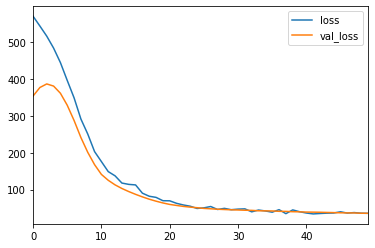

In [83]:

# loss（損失関数）を表示
graph = results[['loss', 'val_loss']].plot()
# graph.set_xlim([0,40])
# graph.set_ylim([80,100])

In [84]:
#最終誤差のオリジナルスケールでの表示
np.sqrt(results.iloc[-1,1])

5.961276728688686

### 演習
- 最適化手法を変更するなどして、工程のモデルの精度を向上させる。
- 代表的最適化手法
   - SGD
   - Adam